In [1]:
import tensorflow

In [2]:
# list gpu
tensorflow.config.list_physical_devices('GPU')

[]

In [3]:
from tensorflow import keras

In [4]:
model = keras.models.load_model('models/base_model.h5')

In [5]:
# import tensorboard from tensorflow
from tensorflow.keras.callbacks import TensorBoard

In [6]:
# draw architecture of model
from tensorflow.keras.utils import plot_model

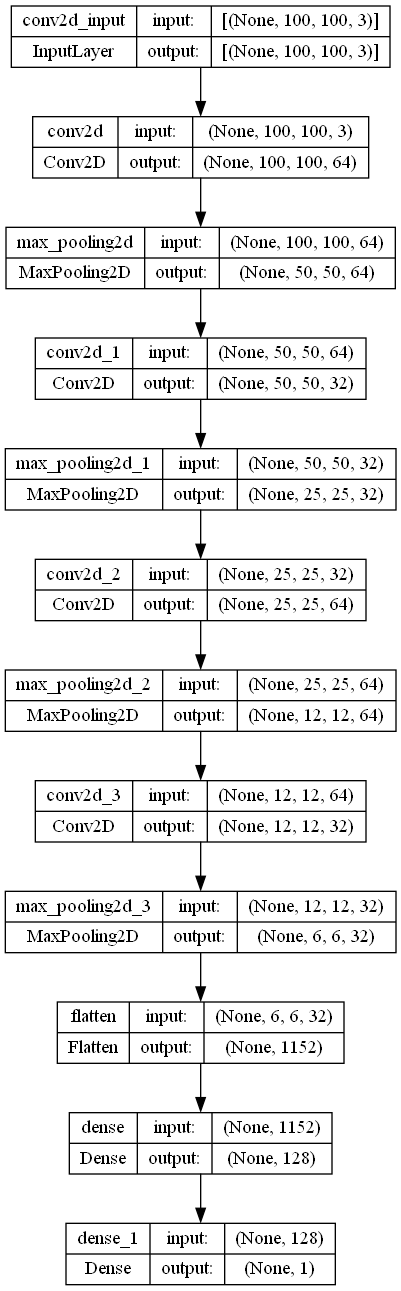

In [7]:
plot_model(model, to_file='model.png', show_shapes=True)

In [8]:
%load_ext tensorboard

In [9]:
from datetime import datetime
from packaging import version

import tensorflow as tf
from tensorflow import keras

print("TensorFlow version: ", tf.__version__)
assert version.parse(tf.__version__).release[0] >= 2, \
    "This notebook requires TensorFlow 2.0 or above."


TensorFlow version:  2.11.0


In [10]:
import tensorboard
tensorboard.__version__


'2.11.2'

In [11]:
logdir="logs/fit/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = keras.callbacks.TensorBoard(log_dir=logdir)

In [14]:
from test_train_data import x_train, y_train, x_test, y_test

In [15]:
# complie model, make sure there is good accuracy and precision
model.compile(optimizer='adam',
                loss='binary_crossentropy',
                metrics=['accuracy', 'Precision'])

In [17]:
model.fit(x_train, y_train, epochs=2, validation_data=(x_test, y_test), callbacks=[tensorboard_callback])

Epoch 1/2
198/198 [==============================] - 77s 384ms/step - loss: 0.0582 - accuracy: 0.9815 - precision: 0.9770 - val_loss: 0.0400 - val_accuracy: 0.9891 - val_precision: 0.9881
Epoch 2/2
198/198 [==============================] - 70s 353ms/step - loss: 0.0230 - accuracy: 0.9924 - precision: 0.9914 - val_loss: 0.0518 - val_accuracy: 0.9848 - val_precision: 0.9745


In [18]:
# evaluate model
model.evaluate(x_test, y_test)

66/66 [==============================] - 4s 66ms/step - loss: 0.0518 - accuracy: 0.9848 - precision: 0.9745


[0.05175583437085152, 0.9848412871360779, 0.9745222926139832]

In [19]:
%tensorboard --logdir logs